# File: Matching.ipynb
# Purpose: To match vacancies collected from
1.   [HSE courses site](https://www.hse.ru/edu/courses/)
2.   [Online edu site](https://online.edu.ru/public/courses)

# to ITMO university educational programs
# Programmer: VG6
# Date: 08.04.2020




# Loading data to pandas Data Frames and inspecting it 

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [4]:
# readind data from csv files to pandas data frames
itmo_subjects_data = pd.read_csv('Data/full_subj_comma.csv', encoding='WINDOWS-1251')
hse_courses_data = pd.read_csv('Data/HSE_courses_data.csv', index_col=0)
online_edu_courses = pd.read_csv('Data/online_edu_full.csv', index_col=0)

In [5]:
# getting first five record in data frames
itmo_subjects_data.head()

,Unnamed: 0,SUBFIELDCODE,SUBFIELDNAME,DEGREE,SUBJECT,SEMESTER,START_YEAR
0,0,09.03.01,"Вычислительные машины, комплексы, системы и сети",Академический бакалавр,Математика,1,2014
1,1,09.03.01,"Вычислительные машины, комплексы, системы и сети",Академический бакалавр,Математика,2,2014
2,2,09.03.01,"Вычислительные машины, комплексы, системы и сети",Академический бакалавр,Физика,1,2014
3,3,09.03.01,"Вычислительные машины, комплексы, системы и сети",Академический бакалавр,Физика,2,2014
4,4,09.03.01,"Вычислительные машины, комплексы, системы и сети",Академический бакалавр,Основы права,1,2014


In [6]:
hse_courses_data.head()

,URL,Название,Содержание учебной дисциплины
0,https://www.hse.ru/edu/courses/303721815,Абстрактная математика,Introduction to Set Theory a. Definitions and ...
1,https://www.hse.ru/edu/courses/302785733,Автобиографический рассказ,Жанр автобиографической прозы и его спецификаВ...
2,https://www.hse.ru/edu/courses/292691508,Автоматизация ньюсрума и роботизированные проц...,"Введение в дисциплину«Робо-журналистика», в пе..."
3,https://www.hse.ru/edu/courses/292707512,Автоматизация проектных работ,Тема 1. Классификация задач автоматизированног...
4,https://www.hse.ru/edu/courses/292707516,Автоматизация проектных работ,Тема 1. Классификация задач автоматизированног...


In [7]:
online_edu_courses.head()

,URL,Название курса,Входные требования,Ключевые слова-пререквизиты,Содержание курса,Ключевые слова содержания,Направления подготовки
0,https://online.edu.ru/public/course.xhtml?face...,Теория игр\n,,NaN,1. Стратегические взаимодействия 2. Доминиру...,"доминируемые стратегии, игры с несовершенной и...",41.03.04 Политология ...
1,https://online.edu.ru/public/course.xhtml?face...,Методы обработки навигационной измерительной и...,,NaN,В курсе рассматриваются следующие темы: Эл...,"scilab, оптимальные оценки, случайные последов...",24.03.02 Системы управления движением и навига...
2,https://online.edu.ru/public/course.xhtml?face...,Методы вычислительной математики\n,,NaN,Раздел 1. Элементарная теория погрешностей....,"методы решения нелинейных уравнений, численное...",01.03.02 Прикладная математика и информатика ...
3,https://online.edu.ru/public/course.xhtml?face...,Функциональное программирование: базовый курс\n,,NaN,В курсе рассматриваются следующие темы: 1. В...,"рекурсия, списки в языке lisp, символы в языке...",09.00.00 Информатика и вычислительная техника ...
4,https://online.edu.ru/public/course.xhtml?face...,Веб-программирование\n,,NaN,В курсе рассматриваются следующие темы: 1. ...,"позиционирование, разметка, html, декоративные...",09.00.00 Информатика и вычислительная техника ...


# Performing EDA

## Getting only usefull rows

In [8]:
# creating conditions to leave onlu valuable rows
mask = itmo_subjects_data['START_YEAR'] >= 2014
mask1 = itmo_subjects_data['SUBFIELDCODE'] != 'ZZZZZZ'
mask2 = itmo_subjects_data['SUBFIELDCODE'] != '999999'
mask3 = itmo_subjects_data['SUBFIELDCODE'] != '00.00.00'

# updating information
itmo_subjects_data = itmo_subjects_data.loc[(mask) & (mask1) & (mask2) & (mask3)]


## Exploring data

In [9]:
# getting most frequent educational programs
educational_programs_frequencies = itmo_subjects_data['SUBFIELDCODE'].value_counts()

<BarContainer object of 40 artists>

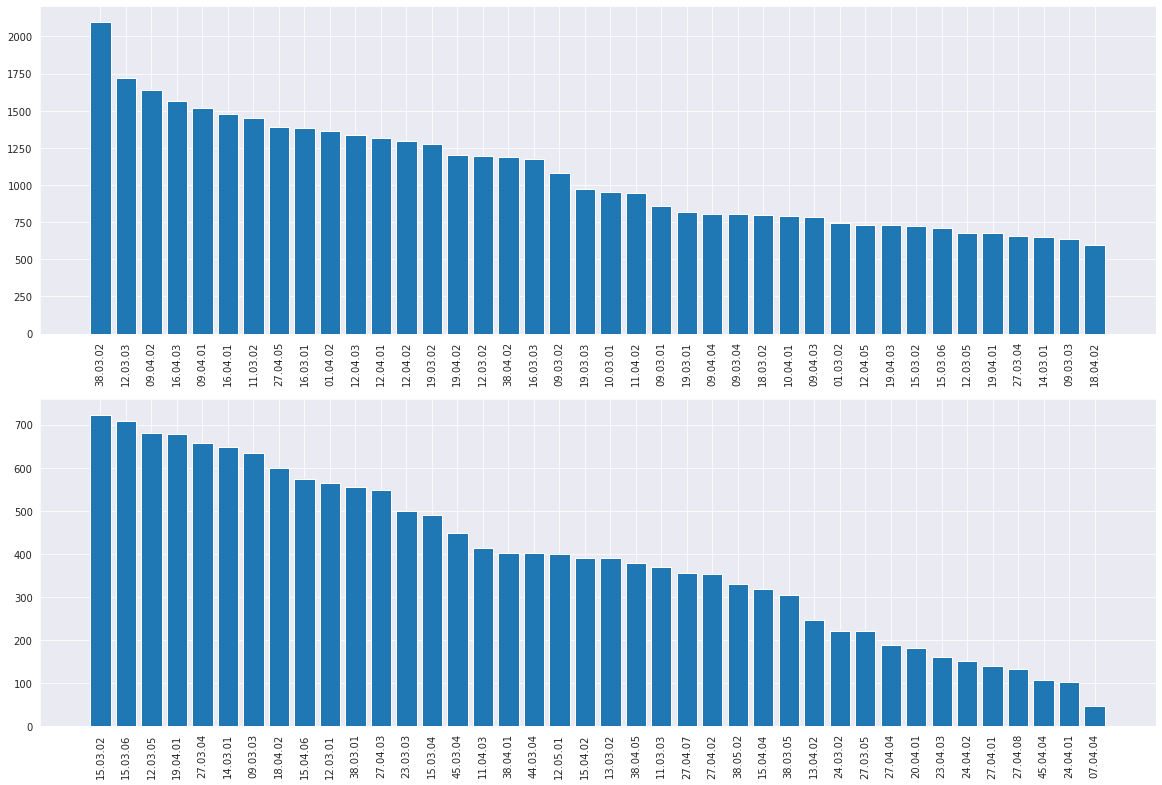

In [10]:
# plotting 40 most frequent educational programs and 40 less frequent programs
plt.figure(figsize=(20, 10))
plt.subplots_adjust(top=3, bottom=2)
plt.subplot(211)
plt.xticks(rotation=90)
plt.bar(x=educational_programs_frequencies.index.values[:40], height=educational_programs_frequencies.values[:40])
plt.subplot(212)
plt.xticks(rotation=90)
plt.bar(x=educational_programs_frequencies.index.values[-40:], height=educational_programs_frequencies.values[-40:])

# Matching ITMO cources to Itmo educational programs

In [11]:
itmo_subjects_data.head()

,Unnamed: 0,SUBFIELDCODE,SUBFIELDNAME,DEGREE,SUBJECT,SEMESTER,START_YEAR
0,0,09.03.01,"Вычислительные машины, комплексы, системы и сети",Академический бакалавр,Математика,1,2014
1,1,09.03.01,"Вычислительные машины, комплексы, системы и сети",Академический бакалавр,Математика,2,2014
2,2,09.03.01,"Вычислительные машины, комплексы, системы и сети",Академический бакалавр,Физика,1,2014
3,3,09.03.01,"Вычислительные машины, комплексы, системы и сети",Академический бакалавр,Физика,2,2014
4,4,09.03.01,"Вычислительные машины, комплексы, системы и сети",Академический бакалавр,Основы права,1,2014


In [12]:
online_edu_courses.head()

,URL,Название курса,Входные требования,Ключевые слова-пререквизиты,Содержание курса,Ключевые слова содержания,Направления подготовки
0,https://online.edu.ru/public/course.xhtml?face...,Теория игр\n,,NaN,1. Стратегические взаимодействия 2. Доминиру...,"доминируемые стратегии, игры с несовершенной и...",41.03.04 Политология ...
1,https://online.edu.ru/public/course.xhtml?face...,Методы обработки навигационной измерительной и...,,NaN,В курсе рассматриваются следующие темы: Эл...,"scilab, оптимальные оценки, случайные последов...",24.03.02 Системы управления движением и навига...
2,https://online.edu.ru/public/course.xhtml?face...,Методы вычислительной математики\n,,NaN,Раздел 1. Элементарная теория погрешностей....,"методы решения нелинейных уравнений, численное...",01.03.02 Прикладная математика и информатика ...
3,https://online.edu.ru/public/course.xhtml?face...,Функциональное программирование: базовый курс\n,,NaN,В курсе рассматриваются следующие темы: 1. В...,"рекурсия, списки в языке lisp, символы в языке...",09.00.00 Информатика и вычислительная техника ...
4,https://online.edu.ru/public/course.xhtml?face...,Веб-программирование\n,,NaN,В курсе рассматриваются следующие темы: 1. ...,"позиционирование, разметка, html, декоративные...",09.00.00 Информатика и вычислительная техника ...


In [17]:
# initliazing Data Frame for matched data
matched_data = pd.DataFrame(columns=['Название', 'DEGREE', 'SUBJECT', 'SEMESTER', 'START_YEAR',
                                   'URL', 'Содержание курса', 'Ключевые слова содержания'])

In [59]:
for educationa_program in itmo_subjects_data.values:
    for course in online_edu_courses.values:
        if re.search(educationa_program[2].lower(), course[1].lower()):
            # forming row
            row = list(educationa_program[2:]) + [course[0]] + list(course[4:6])

            matched_data = matched_data.append([{'Название' : row[0], 'DEGREE': row[1], 'SUBJECT': row[2], 'SEMESTER': row[3], 'START_YEAR': row[4],
          'URL': row[5], 'Содержание курса' : row[6], 'Ключевые слова содержания': row[7]}],  ignore_index=True)

In [61]:
matched_data.shape[0]

5939

In [64]:
matched_data.tail(5)

,Название,DEGREE,SUBJECT,SEMESTER,START_YEAR,URL,Содержание курса,Ключевые слова содержания
5934,Корпоративные информационные системы,Академический бакалавр,Основы экономики,4,2018,https://online.edu.ru/public/course.xhtml?face...,Введение. Основные понятия корпоративных и...,"1С: предприятие, корпоративные информационные ..."
5935,Корпоративные информационные системы,Академический бакалавр,Объектно-ориентированное программирование,3,2018,https://online.edu.ru/public/course.xhtml?face...,Введение. Основные понятия корпоративных и...,"1С: предприятие, корпоративные информационные ..."
5936,Корпоративные информационные системы,Академический бакалавр,Проектирование баз данных,3,2018,https://online.edu.ru/public/course.xhtml?face...,Введение. Основные понятия корпоративных и...,"1С: предприятие, корпоративные информационные ..."
5937,Корпоративные информационные системы,Академический бакалавр,Телекоммуникационные системы и технологии,4,2018,https://online.edu.ru/public/course.xhtml?face...,Введение. Основные понятия корпоративных и...,"1С: предприятие, корпоративные информационные ..."
5938,Корпоративные информационные системы,Академический бакалавр,Культурология,3,2018,https://online.edu.ru/public/course.xhtml?face...,Введение. Основные понятия корпоративных и...,"1С: предприятие, корпоративные информационные ..."


In [63]:
matched_data.to_csv('matched_data.csv')